In [4]:
!pip install bs4

  Using cached bs4-0.0.1-py3-none-any.whl


In [7]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import os

driver=webdriver.Chrome("./chromedriver.exe")
driver.get("http://seibro.or.kr/websquare/control.jsp?w2xPath=/IPORTAL/user/etf/BIP_CNTS06025V.xml&menuNo=174")
time.sleep(5)
a=driver.find_element_by_xpath('//*[@id="image10"]')
a.click()
path = 'ETF.txt'
if os.path.exists(path):os.remove(path)

i=0
while i<19:
    i=i+1
    time.sleep(2)
    a=driver.find_element_by_xpath('//*[@id="pageList1_page_%d"]'%i)
    a.click()

    time.sleep(2)
    html=driver.page_source
    soup=BeautifulSoup(html,"html.parser")
        
    f = open("ETF.txt", 'a')
    for anchors in soup.select("#grid1_body_tbody")[0]:
        for anchor in anchors.select("td"):
            data = anchor.get_text()+'\n'
            f.write(data)      
    f.close()

# 리스트화 하여 항목을 담아주고, 딕셔너리로 변환하여, 판다스 DF만들기
종목명 = [] #1;
코드 = [] #2
유형 = [] #3
순자산 =[] #4
종가 =[] #5
거래량 = [] #6
수익율 = [] #9
총보수 = [] #15
운용사 = [] #16
with open('ETF.txt','r') as f:
    data = f.readlines()
    for i, j in enumerate(data):
        if i % 17 == 1:종목명.append(j.replace('\n',''))
        elif i % 17 ==2:코드.append(j.replace('\n',''))
        elif i % 17 ==3:유형.append(j.replace('\n',''))
        elif i % 17 ==4:순자산.append(j.replace('\n',''))
        elif i % 17 ==5:종가.append(j.replace('\n',''))
        elif i % 17 ==6:거래량.append(j.replace('\n',''))
        elif i % 17 ==9:수익율.append(j.replace('\n',''))
        elif i % 17 ==15:총보수.append(j.replace('\n',''))
        elif i % 17 ==16:운용사.append(j.replace('\n',''))      

data = {'종목명':종목명,'코드':코드,'유형':유형,'순자산':순자산,'종가':종가,'거래량':거래량,'수익율':수익율,'총보수':총보수,'운용사':운용사}
df = pd.DataFrame(data, columns=['종목명','코드','유형','순자산','종가','거래량','수익율','총보수','운용사'])

# 보수, 수익율 없는 상품 제거하기
df = df.drop(df[df['총보수']==''].index)
df = df.drop(df[df['수익율']==''].index)

# 계산 가능한 값으로 변환하기
df['거래량']=df['거래량'].apply(lambda x: x.replace(',',''))
df['종가']=df['종가'].apply(lambda x: x.replace(',',''))
df['순자산']=df['순자산'].apply(lambda x: x.replace(',',''))
df['거래량']=df['거래량'].astype(int)
df['종가']=df['종가'].astype(int)
df['순자산']=df['순자산'].astype(int)
df['수익율']=df['수익율'].astype(float)
df['총보수']=df['총보수'].astype(float)

df.to_csv('./ETF.csv',sep=',',encoding='euc-kr')

C:\Users\David\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  import sys
C:\Users\David\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\David\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead


#### 수익율이 큰 ETF 10개 추출

In [9]:
df['코드'] = df['코드'].astype(str)
i = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
df.loc[i,'코드'] = '0'+ df.loc[i,'코드'].astype(str)

In [10]:
import pandas as pd

df = pd.read_csv('./ETF.csv',encoding='euc-kr',index_col=0)
df['코드'] = df['코드'].astype(str)
i = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
df.loc[i,'코드'] = '0'+ df.loc[i,'코드'].astype(str)
df.sort_values('수익율',ascending =False)[:20]

,종목명,코드,유형,순자산,종가,거래량,수익율,총보수,운용사
88,KODEX WTI원유선물(H),261220,상품/원유,1406,17125,541330,53.04,0.35,삼성자산운용
177,TIGER 원유선물Enhanced(H),130680,상품/원유,466,5140,427324,51.85,0.69,미래에셋자산운용
461,KBSTAR 팔라듐선물(H),334690,상품/금속,64,14970,22701,51.59,0.60,케이비자산운용
222,KODEX 미국S&P에너지(합성),218420,해외지수/해외지수,301,10300,86457,35.79,0.25,삼성자산운용
372,KODEX 콩선물(H),138920,상품/농산물,102,14625,8492,32.11,0.68,삼성자산운용
311,KODEX 3대농산물선물(H),271060,상품/농산물,144,14585,36361,31.51,0.55,삼성자산운용
198,KBSTAR 미국S&P원유생산기업(합성 H),219390,해외지수/해외지수,375,5595,225309,29.66,0.25,케이비자산운용
395,TIGER 금속선물(H),139310,상품/금속,88,8785,16417,24.61,0.69,미래에셋자산운용
204,TIGER 농산물선물Enhanced(H),137610,상품/농산물,351,8150,60550,22.28,0.69,미래에셋자산운용
295,TIGER 글로벌자원생산기업(합성 H),276000,해외지수/해외지수,157,16525,9164,20.05,0.40,미래에셋자산운용


#### 파생상품을 제외한 제품의 목록 만들기 (연금계좌 활용용)

In [11]:
a = ['파생상품/레버리지','파생상품/인버스']
df1 = df[~df['유형'].isin(a)]
df1['유형'].unique()

array(['시장지수/코스피200', '해외지수/해외지수', '채권/단기자금', '시장지수/MSCI Korea Index',
       '그룹주/삼성', '채권/회사채권', '테마/기타', '테마/우량주', '섹터/IT', '섹터/경기소비재',
       '시장지수/코스닥', '스타일/스타일', '테마/SRI', '섹터/금융', '채권/국공채권', '상품/금속',
       '섹터/의료', '기타/기타', '상품/원유', '그룹주/현대차', '섹터/산업재', '통화/미국달러',
       '테마/녹색성장', '그룹주/기타', '섹터/소재', '시장지수/KRX300', '파생상품/구조화', '상품/농산물',
       '시장지수/코스피50', '시장지수/코스피100', '그룹주/LG', '섹터/필수소비재', '투자전략/투자전략',
       '시장지수/KRX100', '통화/기타통화', '섹터/통신서비스'], dtype=object)

In [12]:
# 연금계좌 활용용 ETF를 제외한 3개월 수익율 순위
df1.to_csv('./ETF_IRP.csv',sep=',',encoding='euc-kr')
df1.sort_values('수익율',ascending =False)[:10]

,종목명,코드,유형,순자산,종가,거래량,수익율,총보수,운용사
88,KODEX WTI원유선물(H),261220,상품/원유,1406,17125,541330,53.04,0.35,삼성자산운용
177,TIGER 원유선물Enhanced(H),130680,상품/원유,466,5140,427324,51.85,0.69,미래에셋자산운용
461,KBSTAR 팔라듐선물(H),334690,상품/금속,64,14970,22701,51.59,0.60,케이비자산운용
222,KODEX 미국S&P에너지(합성),218420,해외지수/해외지수,301,10300,86457,35.79,0.25,삼성자산운용
372,KODEX 콩선물(H),138920,상품/농산물,102,14625,8492,32.11,0.68,삼성자산운용
311,KODEX 3대농산물선물(H),271060,상품/농산물,144,14585,36361,31.51,0.55,삼성자산운용
198,KBSTAR 미국S&P원유생산기업(합성 H),219390,해외지수/해외지수,375,5595,225309,29.66,0.25,케이비자산운용
395,TIGER 금속선물(H),139310,상품/금속,88,8785,16417,24.61,0.69,미래에셋자산운용
204,TIGER 농산물선물Enhanced(H),137610,상품/농산물,351,8150,60550,22.28,0.69,미래에셋자산운용
295,TIGER 글로벌자원생산기업(합성 H),276000,해외지수/해외지수,157,16525,9164,20.05,0.40,미래에셋자산운용


In [13]:
import requests
import json
from pandas import json_normalize
url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df2 = json_normalize(json_data['result']['etfItemList'])
df2.sort_values('changeRate',ascending=False)[:10]
df2.columns = ['code','TabCode','이름','현재가','등/락','가격변동','일수익율','일평균가','3개월수익율','거래량/일','거래금액/일,백만','marketSum']
df2 = df2.fillna(0)
df2['3개월수익율'] = df2['3개월수익율'].round(1)
df3 = df2[['code','일수익율','가격변동','거래금액/일,백만']]
df3['코드'] = df3['code']
df2.sort_values('일수익율',ascending=False)[:20]
# df.to_excel('etf_list.xlsx',header=True,index=False);

C:\Users\David\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,code,TabCode,이름,현재가,등/락,가격변동,일수익율,일평균가,3개월수익율,거래량/일,"거래금액/일,백만",marketSum
84,261220,5,KODEX WTI원유선물(H),17125,2,1425,9.08,17133.0,53.0,692444,11760,1451
172,130680,5,TIGER 원유선물Enhanced(H),5140,2,415,8.78,5179.0,51.8,749980,3828,491
454,334690,5,KBSTAR 팔라듐선물(H),14970,2,1145,8.28,14965.0,51.6,37773,557,67
196,219390,4,KBSTAR 미국S&P원유생산기업(합성 H),5595,2,295,5.57,5722.0,29.7,321194,1788,366
313,271060,5,KODEX 3대농산물선물(H),14585,2,470,3.33,14603.0,31.5,36926,536,144
218,218420,4,KODEX 미국S&P에너지(합성),10300,2,325,3.26,10392.0,35.8,174657,1793,314
165,204450,4,KODEX 차이나H레버리지(H),3030,2,90,3.06,3029.0,-24.7,951063,2756,509
295,276000,4,TIGER 글로벌자원생산기업(합성 H),16525,2,470,2.93,16506.0,20.1,3184,52,157
450,291630,3,KOSEF 코스닥150선물레버리지,5685,2,155,2.80,5682.0,-18.3,4754,26,69
426,185680,4,KODEX 미국S&P바이오(합성),23590,2,615,2.68,23639.0,-17.5,2258,53,77


#### 현재(금일) 가격변동을 확인한다

In [14]:
import pandas as pd
df4 = pd.merge(df1, df3, on = '코드', how='left')
df4 = df4[['종목명','코드','순자산','수익율','일수익율','종가','가격변동','거래금액/일,백만','운용사']]
df4.sort_values('일수익율',ascending=False)[:20]

,종목명,코드,순자산,수익율,일수익율,종가,가격변동,"거래금액/일,백만",운용사
80,KODEX WTI원유선물(H),261220,1406,53.04,9.08,17125,1425,11760,삼성자산운용
153,TIGER 원유선물Enhanced(H),130680,466,51.85,8.78,5140,415,3828,미래에셋자산운용
385,KBSTAR 팔라듐선물(H),334690,64,51.59,8.28,14970,1145,557,케이비자산운용
169,KBSTAR 미국S&P원유생산기업(합성 H),219390,375,29.66,5.57,5595,295,1788,케이비자산운용
267,KODEX 3대농산물선물(H),271060,144,31.51,3.33,14585,470,536,삼성자산운용
191,KODEX 미국S&P에너지(합성),218420,301,35.79,3.26,10300,325,1793,삼성자산운용
254,TIGER 글로벌자원생산기업(합성 H),276000,157,20.05,2.93,16525,470,52,미래에셋자산운용
356,KODEX 미국S&P바이오(합성),185680,77,-17.46,2.68,23590,615,53,삼성자산운용
384,ARIRANG S&P글로벌인프라,269530,65,7.88,2.45,12940,310,10,한화자산운용
175,TIGER 농산물선물Enhanced(H),137610,351,22.28,2.39,8150,190,524,미래에셋자산운용


#### 각 항목의 베타를 산출하여 테이블에 추가한다

In [15]:
from datetime import datetime,timedelta
e_date = datetime.now()
period = timedelta(days=90)
s_date = e_date - period
s_date,e_date

(datetime.datetime(2021, 12, 20, 18, 26, 5, 547711),
 datetime.datetime(2022, 3, 20, 18, 26, 5, 547711))

In [19]:
!pip install FinanceDataReader

ERROR: Could not find a version that satisfies the requirement FinanceDataReader (from versions: none)
ERROR: No matching distribution found for FinanceDataReader


In [18]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib as plt
from matplotlib import font_manager
from datetime import datetime,timedelta

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family = font_name);
target = input('target code: '); compare = input('compare code: ')
period = timedelta(days=int(input('조회기간(일자) : ')));

# s_date = input('s_date(yyyy-mm-dd): ') ; e_date =input('e_date(yyyy-mm-dd): ')
s_date = e_date - period ;e_date = datetime.now()
t_name = [i for i in df4[df4['코드']==target]['종목명'].values][0] 
c_name = [i for i in df4[df4['코드']==compare]['종목명'].values][0]

df_temp = fdr.DataReader(target, s_date ,e_date)
df_temp['beta'] = df_temp['Change'].apply(lambda x : x **2)
df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
df_temp_c = fdr.DataReader(compare, s_date, e_date)
df_temp_c['beta'] = df_temp_c['Change'].apply(lambda x : x **2)
df_temp_c['p_index'] = df_temp_c['Close'].apply(lambda x: x/df_temp_c.iloc[0,3])

df_temp['p_index'].plot(color = 'red', legend = 'a',label= t_name, figsize=(16,8))
df_temp_c['p_index'].plot(color = 'grey', legend = 'b',label= c_name, figsize=(16,8))
# 미국 나스닥100과의 corr 함수 통한 음의 상관관계 산출 필요
# df_temp1 = fdr.DataReader( 228810, 266360 , 2019-06-01 , 2020-07-01) 305720 305540 300950 300640 174360 169950 157490


ModuleNotFoundError: No module named 'FinanceDataReader'

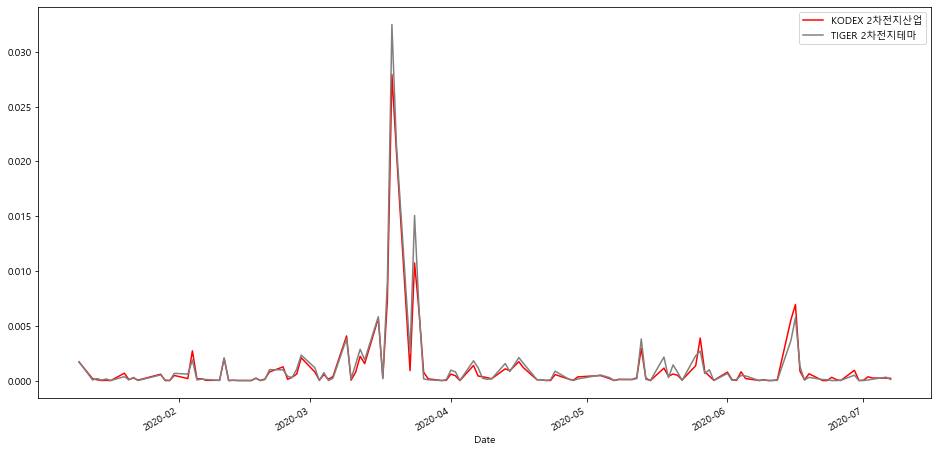

In [14]:
#변동성
df_temp['beta'].plot(color = 'red', legend = 'a',label= t_name, figsize=(16,8))
df_temp_c['beta'].plot(color = 'grey', legend = 'b',label= c_name, figsize=(16,8))

#### 구성종목 확인하기

In [15]:
def comp(code1,code2):
    import requests
    import pandas as pd
    t_name = [i for i in df4[df4['코드']==code1]['종목명'].values][0];c_name = [i for i in df4[df4['코드']==code2]['종목명'].values][0]
    url1 = 'https://finance.naver.com/item/main.nhn?code={}'.format(code1);url2 = 'https://finance.naver.com/item/main.nhn?code={}'.format(code2)
    pr_url1 = requests.get(url1);dfs1 = pd.read_html(pr_url1.text);dfs_c1 = dfs1[3]
    dfs_c1 = dfs_c1.dropna()[['구성종목(구성자산)','구성비중','등락률']];dfs_c1.columns = [t_name,'구성비중','등락률']
    pr_url2 = requests.get(url2);dfs2 = pd.read_html(pr_url2.text); dfs_c2 = dfs2[3]
    dfs_c2 = dfs_c2.dropna()[['구성종목(구성자산)','구성비중','등락률']];dfs_c2.columns = [c_name,'구성비중','등락률'] 
    dfs = pd.concat([dfs_c1,dfs_c2],axis=1);dfs.index = range(1,11)
    return dfs # 향후 등락에 따른 가격 영향도 계산예정 #dfs_c1['영향도'] = dfs_c1['구성비중'] * dfs_c1['등락률'] 
comp(target,compare)

,KODEX 2차전지산업,구성비중,등락률,TIGER 2차전지테마,구성비중,등락률
1,LG화학,20.71%,+2.16%,포스코케미칼,10.75%,-0.38%
2,SK이노베이션,15.87%,-0.37%,LG화학,10.45%,+2.16%
3,삼성SDI,14.15%,+2.32%,SK,10.09%,+1.34%
4,POSCO,13.34%,+1.37%,삼성SDI,10.03%,+2.32%
5,에코프로,9.84%,-1.25%,SK이노베이션,9.34%,-0.37%
6,포스코케미칼,8.62%,-0.38%,에코프로비엠,8.56%,-1.09%
7,일진머티리얼즈,3.78%,+0.19%,일진머티리얼즈,8.29%,+0.19%
8,엘앤에프,3.30%,+13.41%,에코프로,4.18%,-1.25%
9,피엔티,1.51%,-1.74%,엘앤에프,3.89%,+13.41%
10,씨아이에스,1.45%,+1.35%,후성,2.75%,+0.62%


In [46]:
import requests
import pandas as pd
t_name = [i for i in df4[df4['코드']==target]['종목명'].values][0];c_name = [i for i in df4[df4['코드']==compare]['종목명'].values][0]
url1 = 'https://finance.naver.com/item/main.nhn?code={}'.format(target);url2 = 'https://finance.naver.com/item/main.nhn?code={}'.format(compare)
pr_url1 = requests.get(url1);dfs1 = pd.read_html(pr_url1.text);dfs_c1 = dfs1[3]
dfs_c1 = dfs_c1.dropna()[['구성종목(구성자산)','구성비중','등락률']];dfs_c1.columns = [t_name,'구성비중','등락률']
pr_url2 = requests.get(url2);dfs2 = pd.read_html(pr_url2.text); dfs_c2 = dfs2[3]
dfs_c2 = dfs_c2.dropna()[['구성종목(구성자산)','구성비중','등락률']];dfs_c2.columns = [c_name,'구성비중','등락률'] 
dfs = pd.concat([dfs_c1,dfs_c2],axis=1);dfs.index = range(1,11)
dfs[t_name]
# df_krx[df_krx['Symbol']==dfs[target]

1        LG화학
2     SK이노베이션
3       삼성SDI
4       POSCO
5        에코프로
6      포스코케미칼
7     일진머티리얼즈
8        엘앤에프
9         피엔티
10      씨아이에스
Name: KODEX 2차전지산업, dtype: object

In [89]:
df_temp = fdr.DataReader(target, s_date ,e_date)
df_temp

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-09,8911,8976,8846,8961,12420,0.018643
2020-01-10,8995,9190,8995,9190,2206,0.025555
2020-01-13,9160,9534,9160,9524,1935,0.036344
2020-01-14,9549,9589,9499,9524,956,0.000000
2020-01-15,9494,9579,9494,9574,1233,0.005250
...,...,...,...,...,...,...
2020-06-30,11285,11675,11210,11575,10357,0.038117
2020-07-01,11675,11675,11345,11365,7368,-0.018143
2020-07-02,11260,12085,11255,12085,19991,0.063352


In [ ]:
import FinanceDataReader as fdr
# df_temp = fdr.DataReader(target, s_date ,e_date)
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')


In [ ]:
# from bs4 import BeautifulSoup as bs
# import requests
# import pandas as pd
# import FinanceDataReader as fdr

# code = '266360'
# url = 'https://finance.naver.com/item/main.nhn?code={}'.format(code)
# pr_url = requests.get(url)
# dfs = pd.read_html(pr_url.text)
# dfs_c = dfs[3]
# dfs_c = dfs_c.dropna()
# dfs_c

In [70]:
tags

<div id="content">

		<div class="spot spot_short" id="chart_area"><!-- chart가 사라질때  <div class="spot spot_short">-->
			<div class="rate_info">

				
                <dl class="blind">
                        <dt><strong>KODEX 중국본토 A50</strong></dt>
                        <dd>오늘의시세 20,840 포인트</dd>
                        <dd>1,340 포인트 상승</dd>
                        <dd>6.87% 플러스</dd>
                </dl>
                

				<div class="today">
					<p class="no_today">
						
							
								<em class="no_up">
							
							
							
						
							<span class="blind">20,840</span>
							<span class="no2">2</span><span class="no0">0</span><span class="shim">,</span><span class="no8">8</span><span class="no4">4</span><span class="no0">0</span>
						</em>
					</p>
					<p class="no_exday">
						<span class="sptxt sp_txt1">전일대비</span>
						
							
							
								<em class="no_up">
									<span class="ico up">상승</span>
							
							
							
							
						
							<span class